In [ ]:

from google.colab import files
import zipfile
import os

zip_filename = 'archive (2).zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('Top20PlayStoreApps')

print("Files unzipped successfully!")


Files unzipped successfully!


In [ ]:
# Install necessary libraries
!pip install wordcloud
!pip install nltk

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Configure visualizations
%matplotlib inline
sns.set(style="whitegrid")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Define the path to the unzipped folder
data_folder = 'Top20PlayStoreApps/'

# List all CSV files in the folder
csv_files = [file for file in os.listdir(data_folder) if file.endswith('.csv')]

print(f"Found {len(csv_files)} CSV files.")

# Load and concatenate all CSV files with logic to fill missing 'app' values
df_list = []
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    temp_df = pd.read_csv(file_path)

    # Extract app name from file name (assuming file name format is 'AppName.csv')
    app_name = os.path.splitext(file)[0]

    # Fill missing values in 'app' column with the app name
    if 'app' in temp_df.columns:
        temp_df['app'] = temp_df['app'].fillna(app_name)
    else:
        # If 'app' column doesn't exist, create it
        temp_df['app'] = app_name

    df_list.append(temp_df)

# Combine all DataFrames
data = pd.concat(df_list, ignore_index=True)

print("All CSV files have been loaded, and missing 'app' values have been filled.")


Found 21 CSV files.
All CSV files have been loaded, and missing 'app' values have been filled.


In [ ]:
# Display basic information about the combined dataset
print("Dataset Information:")
print(data.info())

print("\nFirst 5 Rows:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   reviewId  400000 non-null  object
 1   content   399926 non-null  object
 2   score     400000 non-null  int64 
 3   app       400000 non-null  object
dtypes: int64(1), object(3)
memory usage: 12.2+ MB
None

First 5 Rows:
                               reviewId  \
0  93ab823a-efcb-454e-8fa9-d4b5e6811f7d   
1  467a09bd-124a-49df-89ab-ea5948d1f96a   
2  9f83c44b-d3da-482b-a131-1cb78c0f7e07   
3  37269206-0890-44e7-b3a3-4cfae90002ee   
4  f7f806e5-f2d6-4f05-aac5-027e0fbab3c9   

                                             content  score     app  
0                         Good but not for childrens      1  TikTok  
1                                               Nice      5  TikTok  
2                       This app time pass and funny      2  TikTok  
3  Best app ever but nuh 

In [ ]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Drop duplicates based on 'reviewId'
initial_count = data.shape[0]
data.drop_duplicates(subset='reviewId', inplace=True)
final_count = data.shape[0]
print(f"\nDropped {initial_count - final_count} duplicate rows.")

# Optionally, drop rows with missing 'content' or 'score'
data.dropna(subset=['content', 'score'], inplace=True)


Missing Values:
reviewId     0
content     74
score        0
app          0
dtype: int64

Dropped 200000 duplicate rows.


Dataset shape: (199963, 4)
                               reviewId  \
0  93ab823a-efcb-454e-8fa9-d4b5e6811f7d   
1  467a09bd-124a-49df-89ab-ea5948d1f96a   
2  9f83c44b-d3da-482b-a131-1cb78c0f7e07   
3  37269206-0890-44e7-b3a3-4cfae90002ee   
4  f7f806e5-f2d6-4f05-aac5-027e0fbab3c9   

                                             content  score     app  
0                         Good but not for childrens      1  TikTok  
1                                               Nice      5  TikTok  
2                       This app time pass and funny      2  TikTok  
3  Best app ever but nuh wan willy kick mhi off a...      5  TikTok  
4                                   Bonjour 😙😊 sinon      5  TikTok  

Missing values per column:
reviewId    0
content     0
score       0
app         0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 199963 entries, 0 to 279999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 

<ipython-input-18-d7ad411afd34>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=data, palette='coolwarm')


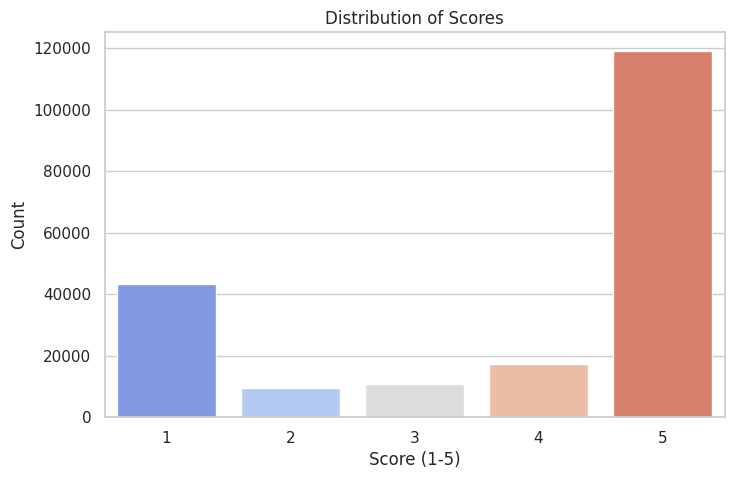

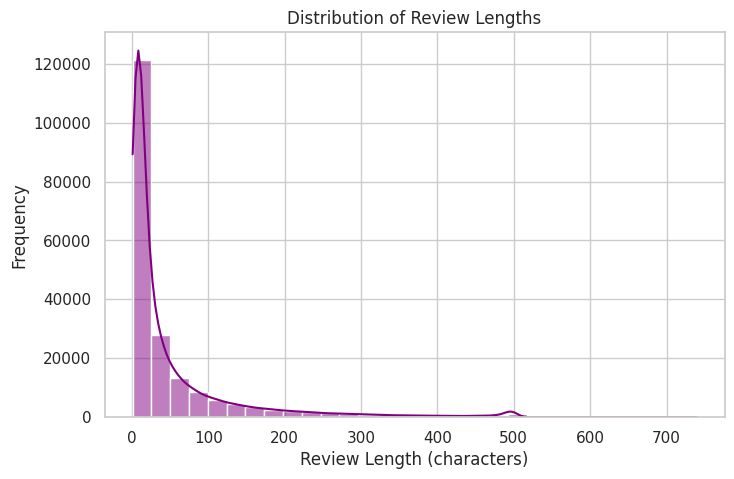

<ipython-input-18-d7ad411afd34>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='review_length', data=data, palette='coolwarm')


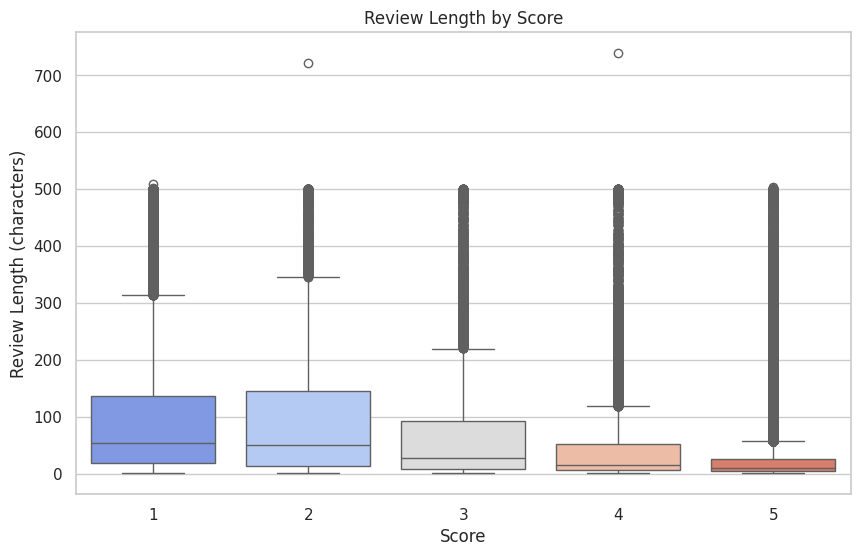

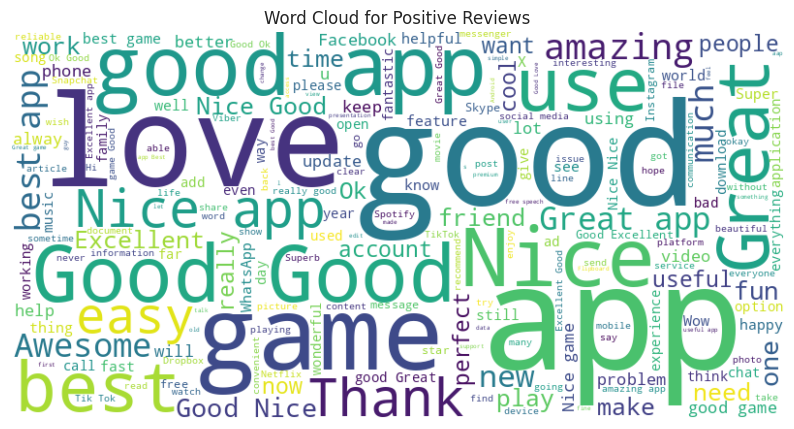

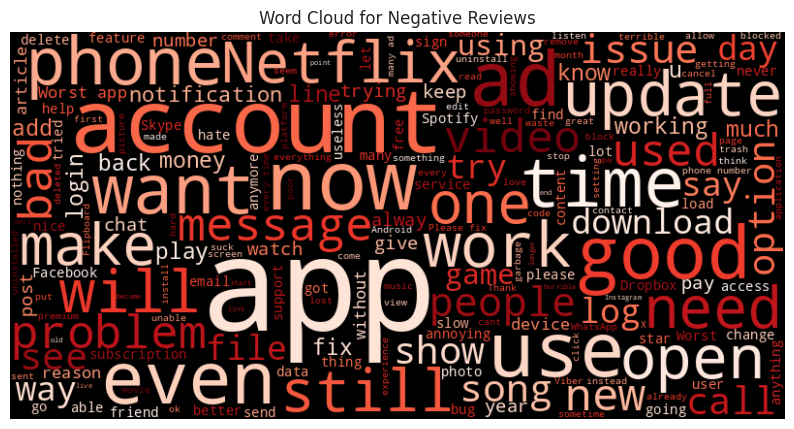


Average review length by score:
score
1    101.048278
2    101.312101
3     73.078592
4     47.868090
5     27.188426
Name: review_length, dtype: float64

Most common words in positive reviews:
[('I', 20033), ('good', 18203), ('app', 18015), ('and', 17300), ('to', 16966), ('the', 15607), ('Good', 14348), ('is', 14017), ('it', 12306), ('a', 9885)]

Most common words in negative reviews:
[('to', 29044), ('the', 25373), ('I', 24974), ('and', 20393), ('a', 14258), ('is', 14008), ('it', 13663), ('my', 13532), ('app', 11822), ('of', 10035)]


ValueError: could not convert string to float: '93ab823a-efcb-454e-8fa9-d4b5e6811f7d'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
print(f"Dataset shape: {data.shape}")
print(data.head())
missing_values = data.isnull().sum()
print("\nMissing values per column:")
print(missing_values)
data['content'] = data['content'].fillna('No Review')
print("\nDataset info:")
print(data.info())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(data.describe())

# Distribution of scores (target variable)
plt.figure(figsize=(8, 5))
sns.countplot(x='score', data=data, palette='coolwarm')
plt.title("Distribution of Scores")
plt.xlabel("Score (1-5)")
plt.ylabel("Count")
plt.show()

# Distribution of review lengths
data['review_length'] = data['content'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data['review_length'], bins=30, kde=True, color='purple')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Box plot of review length by score
plt.figure(figsize=(10, 6))
sns.boxplot(x='score', y='review_length', data=data, palette='coolwarm')
plt.title("Review Length by Score")
plt.xlabel("Score")
plt.ylabel("Review Length (characters)")
plt.show()

# Word cloud for positive reviews (score >= 4)
positive_reviews = ' '.join(data[data['score'] >= 4]['content'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Word cloud for negative reviews (score <= 2)
negative_reviews = ' '.join(data[data['score'] <= 2]['content'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

# Average review length by score
avg_length_by_score = data.groupby('score')['review_length'].mean()
print("\nAverage review length by score:")
print(avg_length_by_score)

# Most frequent words in positive reviews
positive_words = Counter(' '.join(data[data['score'] >= 4]['content']).split())
print("\nMost common words in positive reviews:")
print(positive_words.most_common(10))

# Most frequent words in negative reviews
negative_words = Counter(' '.join(data[data['score'] <= 2]['content']).split())
print("\nMost common words in negative reviews:")
print(negative_words.most_common(10))

# Correlation heatmap
numeric_columns = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


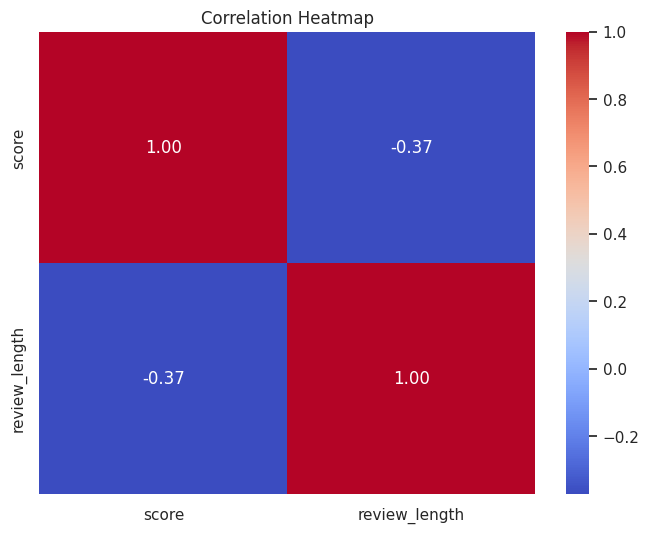

In [ ]:
# Select only numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load data (use a smaller sample to avoid memory issues)
data = pd.read_csv('/content/combined_app_reviews (1).csv')
data = data.sample(n=40000, random_state=42)  # Adjust the number of rows as necessary

# Fill missing values in content
data['content'] = data['content'].fillna('No Review')

# Text Preprocessing (cleaning)
data['cleaned_content'] = data['content'].str.lower().replace(r'\d+', '', regex=True).replace(r'[^\w\s]', '', regex=True)

# Use sparse matrix for TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_content'])

# Convert sparse matrix to DataFrame (optional)
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Prepare target variable (score) and features (X)
X = X_tfidf_df
y = data['score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display final shapes
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set shape: X_train = (32000, 1000), y_train = (32000,)
Testing set shape: X_test = (8000, 1000), y_test = (8000,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model (Logistic Regression)
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the sentiment on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 71.67%
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.68      0.68      1799
           2       0.25      0.01      0.03       370
           3       0.00      0.00      0.00       433
           4       0.44      0.01      0.02       703
           5       0.73      0.96      0.83      4695

    accuracy                           0.72      8000
   macro avg       0.42      0.33      0.31      8000
weighted avg       0.63      0.72      0.64      8000

Confusion Matrix:
[[1223    3    3    0  570]
 [ 180    5    1    0  184]
 [ 142    3    0    4  284]
 [  84    3    3    8  605]
 [ 185    6    0    6 4498]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes - Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_nb) * 100))
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes - Accuracy: 71.67%
              precision    recall  f1-score   support

           1       0.64      0.70      0.67      1799
           2       0.50      0.01      0.02       370
           3       0.00      0.00      0.00       433
           4       0.27      0.00      0.01       703
           5       0.74      0.95      0.83      4695

    accuracy                           0.72      8000
   macro avg       0.43      0.33      0.31      8000
weighted avg       0.63      0.72      0.64      8000

Confusion Matrix:
 [[1266    0    0    0  533]
 [ 192    3    1    1  173]
 [ 162    0    0    3  268]
 [ 117    1    0    3  582]
 [ 227    2    0    4 4462]]


In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Take a smaller subset of the data
X_train_sample = X_train[:5000]
y_train_sample = y_train[:5000]

# Step 2: Normalize the data
scaler = StandardScaler()
X_train_sample_scaled = scaler.fit_transform(X_train_sample)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_sample_scaled, y_train_sample)

# Step 4: Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 5: Evaluate the model
print("SVM - Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



SVM - Accuracy: 63.52%

Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.51      0.54      1730
           2       0.10      0.08      0.09       378
           3       0.07      0.04      0.05       432
           4       0.10      0.05      0.07       651
           5       0.74      0.85      0.80      4809

    accuracy                           0.64      8000
   macro avg       0.32      0.31      0.31      8000
weighted avg       0.59      0.64      0.61      8000


Confusion Matrix:
 [[ 890  138   86   88  528]
 [ 137   31   17   25  168]
 [ 104   35   18   34  241]
 [  89   18   34   34  476]
 [ 347   87  101  165 4109]]


In [5]:
# Sort by score to get the most positive reviews (score 5)
most_positive_reviews = data[data['score'] == 5]

# Display the top 5 most positive reviews
print(most_positive_reviews[['app', 'content', 'score']].head(100))


                     app                                            content  \
23218            Netflix  Bro I love the Is app it can play what ever mo...   
147506          Facebook                                        ء خکی۔ 1لئر   
190913    Subway Surfers                  Very good game and addictive too!   
49119     Microsoft Word  word is a best app for everyone because typing...   
208005     Facebook Lite                  The application works flawlessly.   
...                  ...                                                ...   
275015         Flipboard                          Entertaining for readers.   
330006              LINE                                              think   
16589   Candy Crush Saga                                                Fun   
361940           SHAREit                                               Good   
87812     Subway Surfers                     Wonderful games full time lass   

        score  
23218       5  
147506      5  
190

In [6]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Define a function to get the sentiment score
def get_sentiment_score(review):
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']  # 'compound' score ranges from -1 (negative) to 1 (positive)
# Apply sentiment analysis to the 'content' column
data['sentiment_score'] = data['content'].apply(get_sentiment_score)
# Identify the most positive reviews (sentiment_score close to 1)
most_positive_reviews = data[data['sentiment_score'] > 0.5]  # Choose a threshold (e.g., 0.5)
# Display the top 5 most positive reviews
print(most_positive_reviews[['app', 'content', 'sentiment_score']].head(5))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00
                   app                                            content  \
23218          Netflix  Bro I love the Is app it can play what ever mo...   
190913  Subway Surfers                  Very good game and addictive too!   
296715           Skype                                            Awesome   
141482        Facebook              Video reels and short video excellent   
49119   Microsoft Word  word is a best app for everyone because typing...   

        sentiment_score  
23218            0.7650  
190913           0.5400  
296715           0.6249  
141482           0.5719  
49119            0.8957  


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_score(review):
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']  # 'compound' score ranges from -1 (negative) to 1 (positive)
# Apply sentiment analysis to the 'content' column
data['sentiment_score'] = data['content'].apply(get_sentiment_score)
# Identify the most negative reviews (sentiment_score close to -1)
most_negative_reviews = data[data['sentiment_score'] < -0.5]  # Choose a threshold for negative sentiment
# Display the top 5 most negative reviews
print(most_negative_reviews[['app', 'content', 'sentiment_score']].head(5))


            app                                            content  \
20731   Netflix                                              Worst   
39555   Spotify     Worst app !! To be labelled as only paid app!!   
314215  Dropbox     very bad app. Asks for money before logging in   
99085     Skype  Why can't I receive notifications anymore it's...   
257076  Netflix  Nah Netflix, I'm installing you guys, and you ...   

        sentiment_score  
20731           -0.6249  
39555           -0.7405  
314215          -0.5849  
99085           -0.7188  
257076          -0.8521  


In [8]:
!pip install textblob
from textblob import TextBlob
# Define a function to get the sentiment polarity (ranges from -1 to 1)
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity
# Apply sentiment analysis to the 'content' column
data['sentiment_polarity'] = data['content'].apply(get_sentiment_polarity)
# Identify the most positive reviews (sentiment_polarity close to 1)
most_positive_reviews = data[data['sentiment_polarity'] > 0.5]  # Choose a threshold (e.g., 0.5)
# Display the top 5 most positive reviews
print(most_positive_reviews[['app', 'content', 'sentiment_polarity']].head(5))



                   app                                            content  \
296715           Skype                                            Awesome   
49119   Microsoft Word  word is a best app for everyone because typing...   
208005   Facebook Lite                  The application works flawlessly.   
357337       Instagram                                         Awesome 😎💯   
358922       Instagram                                Its a wonderful app   

        sentiment_polarity  
296715            1.000000  
49119             0.811111  
208005            1.000000  
357337            1.000000  
358922            1.000000  


In [9]:
from textblob import TextBlob
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity  # Polarity score between -1 and 1
data['sentiment_polarity'] = data['content'].apply(get_sentiment_polarity)
# Identify the most negative reviews (sentiment_polarity close to -1)
most_negative_reviews = data[data['sentiment_polarity'] < -0.5]  # Choose a threshold for negative sentiment
# Display the top 5 most negative reviews
print(most_negative_reviews[['app', 'content', 'sentiment_polarity']].head(5))


            app                                            content  \
20731   Netflix                                              Worst   
314215  Dropbox     very bad app. Asks for money before logging in   
99085     Skype  Why can't I receive notifications anymore it's...   
305832  Spotify                                           very bad   
334526     LINE                      Could not login... Very worst   

        sentiment_polarity  
20731                -1.00  
314215               -0.91  
99085                -0.65  
305832               -0.91  
334526               -1.00  


In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Step 3: Apply Sentiment Analysis to the 'content' column
data['sentiment_score'] = data['content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
# Step 4: Define the sentiment categories based on VADER scores
data['sentiment'] = data['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral'
)
# Step 5: Count the number of positive reviews for each app
positive_counts = data[data['sentiment'] == 'positive'].groupby('app')['sentiment'].count()
# Step 6: Find the app with the most positive reviews
most_positive_app = positive_counts.idxmax()
most_positive_count = positive_counts.max()
print(f"The app with the most positive reviews is '{most_positive_app}' with {most_positive_count} positive reviews.")
# Optional: Display all apps sorted by the number of positive reviews
sorted_positive_counts = positive_counts.sort_values(ascending=False)
print("\nTop Apps by Positive Reviews:")
print(sorted_positive_counts)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


The app with the most positive reviews is 'Candy Crush Saga' with 1530 positive reviews.

Top Apps by Positive Reviews:
app
Candy Crush Saga        1530
Subway Surfers          1513
Microsoft Word          1459
Microsoft PowerPoint    1374
Skype                   1371
Facebook Messenger      1341
Viber                   1235
SHAREit                 1234
Facebook                1205
Snapchat                1164
Instagram               1153
Dropbox                 1150
Facebook Lite           1130
TikTok                  1091
WhatsApp                1083
Twitter                 1055
Spotify                 1019
Flipboard                975
Netflix                  880
LINE                     856
Name: sentiment, dtype: int64


In [16]:
# Step 1: Filter reviews of the most positive app
most_positive_app_reviews = data[data['app'] == most_positive_app]

# Step 2: Sort reviews by sentiment_score in descending order
top_positive_reviews = most_positive_app_reviews.sort_values(by='sentiment_score', ascending=False).head(5)

# Step 3: Display the top 5 reviews
print(f"Top 5 Positive Reviews for '{most_positive_app}':")
for i, review in enumerate(top_positive_reviews['content'], start=1):
    print(f"\nReview {i}: {review}")


Top 5 Positive Reviews for 'Candy Crush Saga':

Review 1: I am really enjoying this game, after a long time I have installed this game in my phone, but this game has given me great entertainment and the candies of this game are so nice and delicious in appearance that I want to eat them. So, I really like this game... i love this game....❤️❤️❤️ Than U for giving a best game.. i deeply fall in love with this game....This Game Gives me very delicious surprises and i enjoying it.❤️

Review 2: Great game. Very challenging. Lots of fun. Great way to pass time. Love it! Good times all the time. Fun times! Yay!!! Fun fun..love it Fun game..love this game...A fun game!!!!!

Review 3: Best Match 3 game I have ever played. You can get currency by playing the game, as well as pretty much any booster. Love all the special candy combos, Striped/Wrapped combo is my personal favorite. 5/5, great for car rides.

Review 4: Absolutely love it! Always fun great way to pass the time or keep from being bor

In [17]:
# Step 1: Filter reviews of the most positive app
most_positive_app_reviews = data[data['app'] == most_positive_app]

# Step 2: Sort reviews by sentiment_score in descending order
top_positive_reviews = most_positive_app_reviews.sort_values(by='sentiment_score', ascending=False).head(5)

# Step 3: Display the top 5 positive reviews
print(f"Top 5 Positive Reviews for '{most_positive_app}':")
for i, review in enumerate(top_positive_reviews['content'], start=1):
    print(f"\nReview {i}: {review}")

# Step 4: Count the number of negative reviews for each app
negative_counts = data[data['sentiment'] == 'negative'].groupby('app')['sentiment'].count()

# Step 5: Find the app with the most negative reviews
most_negative_app = negative_counts.idxmax()
most_negative_count = negative_counts.max()

# Step 6: Filter reviews of the most negative app
most_negative_app_reviews = data[data['app'] == most_negative_app]

# Step 7: Sort reviews by sentiment_score in ascending order (most negative first)
top_negative_reviews = most_negative_app_reviews.sort_values(by='sentiment_score').head(5)

# Step 8: Display the top 5 negative reviews
print(f"\nTop 5 Negative Reviews for '{most_negative_app}':")
for i, review in enumerate(top_negative_reviews['content'], start=1):
    print(f"\nReview {i}: {review}")


Top 5 Positive Reviews for 'Candy Crush Saga':

Review 1: I am really enjoying this game, after a long time I have installed this game in my phone, but this game has given me great entertainment and the candies of this game are so nice and delicious in appearance that I want to eat them. So, I really like this game... i love this game....❤️❤️❤️ Than U for giving a best game.. i deeply fall in love with this game....This Game Gives me very delicious surprises and i enjoying it.❤️

Review 2: Great game. Very challenging. Lots of fun. Great way to pass time. Love it! Good times all the time. Fun times! Yay!!! Fun fun..love it Fun game..love this game...A fun game!!!!!

Review 3: Best Match 3 game I have ever played. You can get currency by playing the game, as well as pretty much any booster. Love all the special candy combos, Striped/Wrapped combo is my personal favorite. 5/5, great for car rides.

Review 4: Absolutely love it! Always fun great way to pass the time or keep from being bor